In this notebook, I'll be importing data from Instacart, and processing it to gain an understanding of customer shopping habits, popular products, how often customers reorder, and which products are ordered the most. 
The goal is for Instacart to gain insight on its customers and how they use the application, to target improvement.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# Importing Orders dataframe
df_orders = pd.read_csv('./instacart_orders.csv',sep=';')
# Using info() method to get familiar with dataframe size, columns, values, null values, and data types
df_orders.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [3]:
# Importing Products dataframe
df_products = pd.read_csv('./products.csv',sep=';')
df_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [4]:
# Importing Aisles dataframe
df_aisles = pd.read_csv('./aisles.csv',sep=';')
df_aisles.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [5]:
# Importing Department dataframe
df_dept = pd.read_csv('./departments.csv',sep=';')
df_dept.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [6]:
# Importing Order Product dataframe
df_order_prdt = pd.read_csv('./order_products.csv',sep=';')
df_order_prdt.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [7]:
# Checking for duplicated orders
df_orders.duplicated().sum()

15

We have 15 duplicate rows in the order dataframe

In [8]:
# Checking for all orders placed Wednesday at 2:00 AM

# Getting unique and sorted values of days using np.sort()
print('Unique values in order_dow: ',np.sort(df_orders['order_dow'].unique()))

# Getting unique and sorted values of hour of day, to get an idea of data representation
print('Unique values in hour of day: ', np.sort(df_orders['order_hour_of_day'].unique()))

# Filtering for 3rd day of week and 2am
df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)]

Unique values in order_dow:  [0 1 2 3 4 5 6]
Unique values in hour of day:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


The values in order_dow & order_hour_of_day make sense, further validation that data imported correctly

In [9]:
# Removing duplicate orders
df_orders.drop_duplicates(inplace=True)

In [10]:
# Double checking for duplicate rows
df_orders.duplicated().sum()

0

In [11]:
# Double checking for duplicate order IDs only
df_orders['order_id'].duplicated().sum()

0

No duplicate order ids, which is necessary for the rest of this analysis

In [12]:
# Checking data types
df_orders.dtypes



order_id                    int64
user_id                     int64
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

Days_since_prior_order is a float and it should be an int

In [13]:
# Casting days_since_prior_order from float to int
df_orders['days_since_prior_order'] = df_orders['days_since_prior_order'].astype('Int64')

# Checking that conversion worked
df_orders.dtypes

order_id                  int64
user_id                   int64
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    Int64
dtype: object

### `products` data frame

In [14]:
# Checking for fully duplicate rows
df_products.duplicated().sum()

0

In [15]:
# Checking for just duplicate product IDs
df_products['product_id'].duplicated().sum()

0

In [16]:
# Checking for just duplicate product names (convert names to lowercase to compare better)
df_products['product_name'] = df_products['product_name'].str.lower()
df_products['product_name'].duplicated().sum()

1361

1361 have duplicate product names

In [17]:
# Checking for duplicate product names that aren't missing
df_products['product_name'][(df_products['product_name'].duplicated()) & (~df_products['product_name'].isna())]

2058                                     biotin 1000 mcg
5455                    green tea with ginseng and honey
5558                              cream of mushroom soup
7558                           cinnamon rolls with icing
9037                              american cheese slices
                              ...                       
49689                      high performance energy drink
49690                      original pancake & waffle mix
49691    organic instant oatmeal light maple brown sugar
49692                             spring water body wash
49693                            burrito- steak & cheese
Name: product_name, Length: 104, dtype: object

There are 104 duplicate product names that are not missing, which means 1258 (1361-104+1) rows are missing product name

### `departments` data frame

In [18]:
df_dept.info()
# This is a small dataframe of only 21 rows & 2 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [19]:
# Checking for row duplicates and displaying entire dataframe
print(df_dept.duplicated().sum())
df_dept
# There are no duplicate rows and it's interesting that department id 21 has description "missing"

0


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


### `aisles` data frame

In [20]:
df_aisles.info()
# This is a relatively small dataframe of only 134 rows & 2 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [21]:
# Checking for row duplicates
print(df_aisles.duplicated().sum())

0


### `order_products` data frame

In [22]:
# Checking for fully duplicate rows
df_order_prdt.duplicated().sum()

0

In [23]:
# Double checking for any other tricky duplicates
df_order_prdt.duplicated(['order_id','product_id']).sum()

0

There are no order_id & product_id combination duplicates

## Find and remove missing values


### `products` data frame

In [24]:
# Getting count of null values for each row in products dataframe
df_products.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [25]:
# Are all of the missing product names associated with aisle ID 100?
df_products[df_products['product_name'].isna()]['aisle_id'].unique()

#Yes! All missing product names are associated with aisle ID 100

array([100])

In [26]:
# Are all of the missing product names associated with department ID 21?
df_products[df_products['product_name'].isna()]['department_id'].unique()
#Yes! All missing product names are associated with department ID 21

array([21])

In [27]:
# What is this ailse and department?
print(df_aisles[df_aisles['aisle_id'] == 100]['aisle'])

print(df_dept[df_dept['department_id'] == 21]['department'])

#Aisle & department are "missing"

99    missing
Name: aisle, dtype: object
20    missing
Name: department, dtype: object


In [28]:
# Filling missing product names with 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Uknown')
df_products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

All missing product names are associated with "missing" aisle & "missing" department id, so missing product name was replaced with "Unknown"

### `orders` data frame

In [29]:
# Getting number of null values for each column
df_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [30]:
# Are there any missing values where it's not a customer's first order?
((df_orders['order_number'] > 1) & (df_orders['days_since_prior_order'].isna())).sum()

# No. All missing values are for customers placing first order

0

### `order_products` data frame

In [31]:
# Getting number of null values for each column
df_order_prdt.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [32]:
# What are the min and max values in this column?
df_order_prdt['add_to_cart_order'].describe()

# Min for add_to_cart_order is 1 and max is 64

count    4.544171e+06
mean     8.351669e+00
std      7.080368e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      6.400000e+01
Name: add_to_cart_order, dtype: float64

In [33]:
# Saving all order IDs with at least one missing value in 'add_to_cart_order'
orders_no_add_to_cart = np.sort(df_order_prdt[df_order_prdt['add_to_cart_order'].isna()]['order_id'].unique())

In [34]:
# Do all orders with missing values have more than 64 products?

# Grouping by order_id and counting number of product_ids in each order
df_order_id_group = df_order_prdt.groupby('order_id')['product_id'].count()

# Filterting grouped dataframe for orders with more than 64 products
orders_more_than_64_products = df_order_id_group[df_order_id_group > 64].index.tolist()

# Comparing all orders with missing value in 'add_to_cart_order' & all orders with more than 64 products 
np.array_equal(orders_no_add_to_cart, orders_more_than_64_products)

# Yes, all orders with missing values have more than 64 products

True

In [35]:
# Replacing missing values with 999 and converting column to integer type
df_order_prdt['add_to_cart_order'].fillna(999,inplace=True)
df_order_prdt = df_order_prdt.astype('int64')
df_order_prdt.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [36]:
# Using .unqiue() & .sort_values() methods on order_hour_of_day column to get unique and sorted values
df_orders['order_hour_of_day'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [37]:
# Doing the same as above on order_dow column
df_orders['order_dow'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6])

### [A2] What time of day do people shop for groceries?

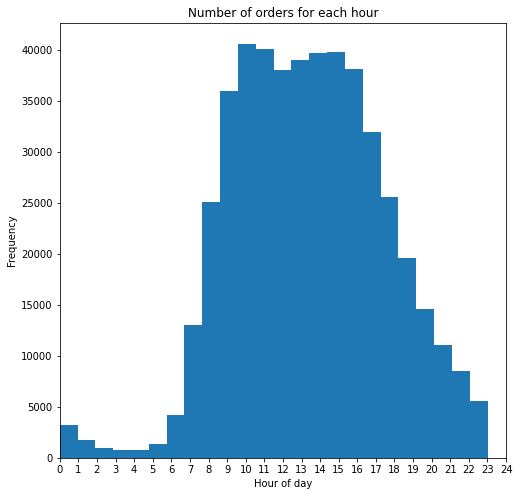

In [38]:
# After preprocessing the data, Orders dataframe doesn't have any duplicates and each row corresponds to a unique order. 
# Plotting a histogram of the order_hour_of_day to show the distribution of orders across the hours of the day

plot=df_orders['order_hour_of_day'].plot(
        legend=False,
        title='Number of orders for each hour',
        xlim=[0,24],
        xticks=range(0,25),
        ylabel='Number of orders',
        kind='hist',
        bins=24,
        figsize=[8,8]
        )
plot.set_xlabel("Hour of day")
plt.show()

People shop for groceries all hours of the day. Most are placed 8am-5pm with busiest times occuring 9am-3pm

### [A3] What day of the week do people shop for groceries?

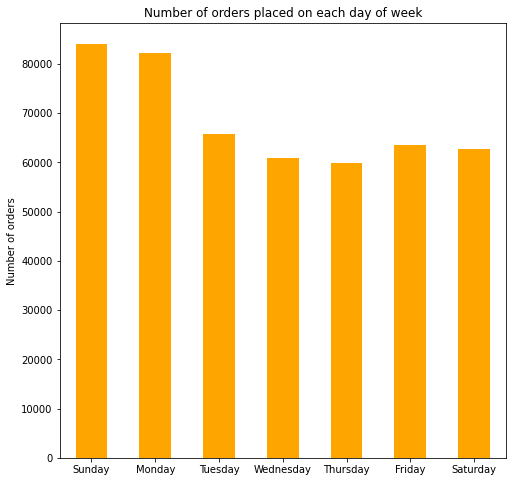

In [39]:
plot = df_orders.groupby('order_dow')['order_id'].count().plot(
        legend=False,
        title='Number of orders placed on each day of week',
        xticks=range(0,7),
        #xticklabels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
        xlabel='',
        ylabel='Number of orders',
        kind='bar',
        figsize=[8,8],
        color='orange',
        rot=0
        )
plot.set_xticklabels(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.show()

People shop for groceries on all days

### [A4] How long do people wait until placing another order?

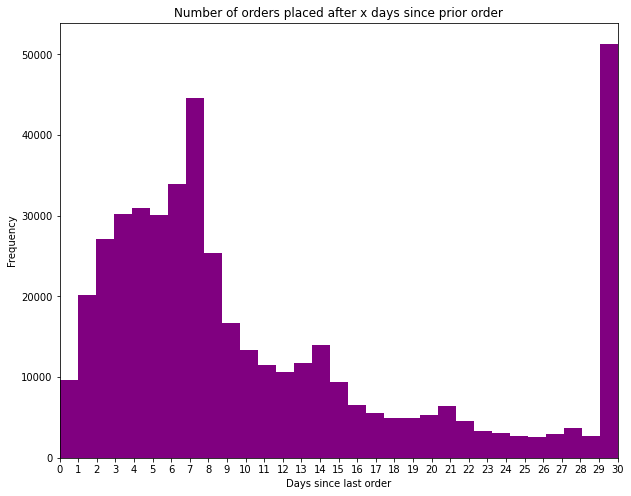

In [40]:
# Using Orders dataframe, we plot a histogram of the days_since_prior_order to show the distribution of repeat orders based on
# number of days since last order

plot=df_orders['days_since_prior_order'].plot(
        legend=False,
        title='Number of orders placed after x days since prior order',
        kind='hist',
        #xlabel="Days since last order",
        figsize=[10,8],
        color='purple',
        bins=31,
        xlim=[0,30],
        xticks=range(0,31)
        )
plot.set_xlabel("Days since last order")
plt.show()

Anywhere between 0 and 30 days. Most reorders occur on the 30th day, and majority of reorders occur within 7 days.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [41]:
# Filtering orders placed on Wednesday
df_orders_Wed = df_orders[df_orders['order_dow'] == 3]

# Filtering orders placed on Saturday
df_orders_Sat = df_orders[df_orders['order_dow'] == 6]

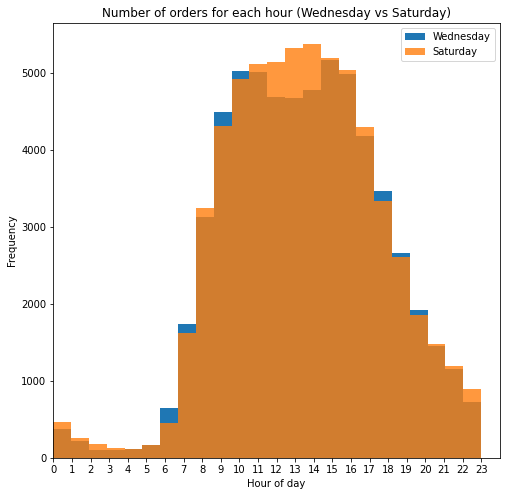

In [42]:
# Plotting two historgrams of order_hour_of_day for Wednesday and for Saturday on the same plot for easy comparison
plot=df_orders_Wed['order_hour_of_day'].plot(
        legend=False,
        title='Number of orders for each hour (Wednesday vs Saturday)',
        xlim=[0,24],
        xticks=range(0,24),
        kind='hist',
        bins=24,
        figsize=[8,8]
        )


df_orders_Sat['order_hour_of_day'].plot(
        legend=False,
        kind='hist',
        bins=24,
        figsize=[8,8],
        alpha=0.8
        )

plt.legend(['Wednesday','Saturday'])
plot.set_xlabel("Hour of day")
plt.show()

Order distributions are similar for most hours of the day except between 11am and 2pm, where Saturday orders peak while Wednesday orders decline


### [B2] What's the distribution for the number of orders per customer?

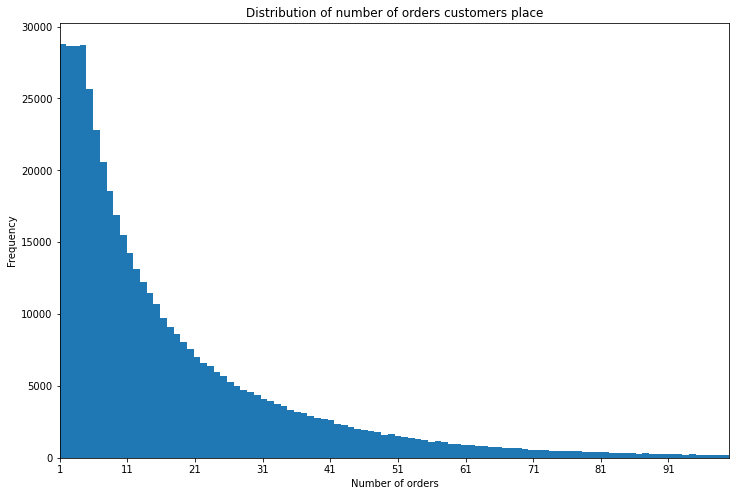

In [43]:
# Using order dataframe, we create a histogram of number of orders (order_number column) customers place
plot=df_orders['order_number'].plot(
        legend=False,
        title='Distribution of number of orders customers place',
        xlim=[1,100],
        xticks=range(1,100,10),
        kind='hist',
        bins=100,
        figsize=[12,8]
        )
plot.set_xlabel("Number of orders")
plt.show()

Most customers place 10 orders or less with an exponential decline in customers who place 11 to 100 orders

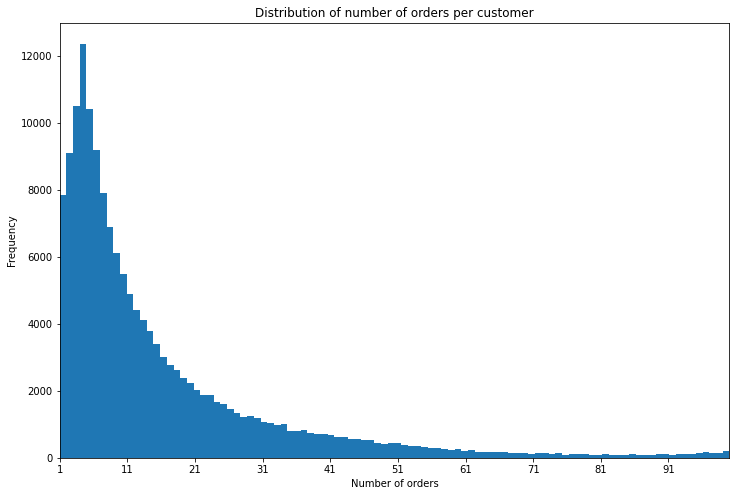

In [44]:
# Grouping by the user_id column, and taking the max value of order_number column, we get the number of orders for each customer
# Plotting a histogram of number of orders for each customer

df_number_of_orders_per_userid = df_orders.groupby('user_id')['order_number'].max()
plot = df_number_of_orders_per_userid.plot(
        legend=False,
        title='Distribution of number of orders per customer',
        xlim=[1,100],
        xticks=range(1,100,10),
        kind='hist',
        bins=100,
        figsize=[12,8]
        )
plot.set_xlabel("Number of orders")
plt.show()

This histogram shows that most customers place 5-7 orders

### [B3] What are the top 20 popular products (display their id and name)?

In [45]:
# Doing a left merge of order product dataframe with product dataframe on product_id 
df_merged = df_order_prdt.merge(df_products,on='product_id',how='left')

In [46]:
# Using value_counts() method to get list of values and correponding counts then slicing the first 20 rows
df_merged[['product_id','product_name']].value_counts()[0:20]

product_id  product_name            
24852       banana                      66050
13176       bag of organic bananas      53297
21137       organic strawberries        37039
21903       organic baby spinach        33971
47209       organic hass avocado        29773
47766       organic avocado             24689
47626       large lemon                 21495
16797       strawberries                20018
26209       limes                       19690
27845       organic whole milk          19600
27966       organic raspberries         19197
22935       organic yellow onion        15898
24964       organic garlic              15292
45007       organic zucchini            14584
39275       organic blueberries         13879
49683       cucumber kirby              13675
28204       organic fuji apple          12544
5876        organic lemon               12232
8277        apple honeycrisp organic    11993
40706       organic grape tomatoes      11781
dtype: int64

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

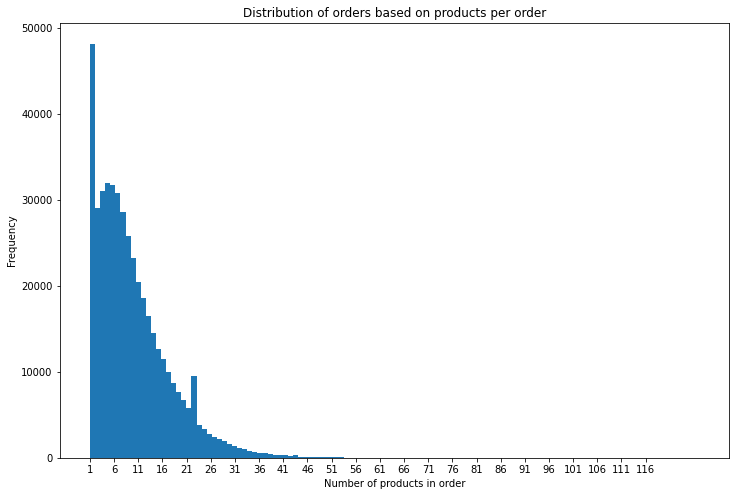

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64

In [47]:
# Using order product dataframe, group by order id and counting number of product ids in each order, and plotting result
plot=df_order_prdt.groupby('order_id')['product_id'].count().plot(
        legend=False,
        title='Distribution of orders based on products per order',
        kind='hist',
        xticks=range(1,120,5),
        bins=120,
        figsize=[12,8]
        )
plot.set_xlabel("Number of products in order")
plt.show()

df_order_prdt.groupby('order_id')['product_id'].count().describe()

Highest number of orders contain only 1 product. 50% of orders have 8 or less products, 75% have 14 or less products, and only 25% orders contain 15 to 127 products

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [48]:
# Grouping df_merged by product id and summing reordered values for each product, sort descending, slice first 20 rows and get index values
top_20 = df_merged.groupby('product_id')['reordered'].sum().sort_values(ascending=False)[0:20].index

# Array of top 20 product ids that are reordered most frequently
top_20

Int64Index([24852, 13176, 21137, 21903, 47209, 47766, 27845, 47626, 27966,
            16797, 26209, 22935, 24964, 45007, 49683, 28204,  8277, 39275,
             5876, 49235],
           dtype='int64', name='product_id')

In [49]:
# Displaying product_id & product_name by setting product_id as index of sliced df_merged and using .loc() on top_20 array
df_merged[['product_id', 'product_name']].drop_duplicates().set_index('product_id').loc[top_20].reset_index()

,product_id,product_name
0,24852,banana
1,13176,bag of organic bananas
2,21137,organic strawberries
3,21903,organic baby spinach
4,47209,organic hass avocado
5,47766,organic avocado
6,27845,organic whole milk
7,47626,large lemon
8,27966,organic raspberries
9,16797,strawberries


### [C3] For each product, what proportion of its orders are reorders?

In [50]:
# Getting total number of reorders for each product id
product_total_reorders = df_merged.groupby('product_id')['reordered'].sum()

# Getting total number of orders for each product id
product_total_orders = df_merged.groupby('product_id')['order_id'].count()

# Dividing reorders by total orders, multipling by 100 to get a percentage and rounding float to 2nd nearest decimal
s_ratio = round(product_total_reorders / product_total_orders*100,2)

# Transforming series to a dataframe using .to_frame() method, so it can be merged with another dataframe
df_ratio = s_ratio.to_frame(name='Reorders/Orders %')

# Doing a left merge of df_ratio with df_merged on product_id
df_ratio_merged = df_ratio.merge(df_merged[['product_id','product_name']],on='product_id',how='left')

# Removing duplicate rows
df_ratio_merged.drop_duplicates(inplace=True)

# Using reindex() method to move product_name column next to product_id for readability
df_ratio_merged = df_ratio_merged.reindex(columns=["product_id", "product_name", "Reorders/Orders %"])

# Displaying list of each product id, product name, and it's corresponding reorder/order ratio in percentage
df_ratio_merged

,product_id,product_name,Reorders/Orders %
0,1,chocolate sandwich cookies,56.43
280,2,all-seasons salt,0.00
291,3,robust golden unsweetened oolong tea,73.81
333,4,smart ones classic favorites mini rigatoni wit...,51.02
382,7,pure coconut water with orange,50.00
...,...,...,...
4544884,49690,high performance energy drink,80.00
4544889,49691,original pancake & waffle mix,43.06
4544961,49692,organic instant oatmeal light maple brown sugar,41.67
4544973,49693,spring water body wash,44.00


### [C4] For each customer, what proportion of their products ordered are reorders?

In [51]:
# Doing an inner merge of orders dataframe and order product datafreame on order_id to keep only values where order_id is in both dataframes
df_order_prdt_merge = df_orders.merge(df_order_prdt,on='order_id',how='inner')
df_order_prdt_merge

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1515936,183418,11,6,13,30,19048,1,1
1,1515936,183418,11,6,13,30,47766,3,1
2,1515936,183418,11,6,13,30,45066,9,0
3,1515936,183418,11,6,13,30,24082,11,0
4,1515936,183418,11,6,13,30,24363,4,0
...,...,...,...,...,...,...,...,...,...
4545002,2071924,1730,18,1,14,15,1503,17,0
4545003,2071924,1730,18,1,14,15,4778,12,1
4545004,2071924,1730,18,1,14,15,11512,1,1
4545005,2071924,1730,18,1,14,15,4920,6,1


In [52]:
# Group merged dataframe by user_id and get sum of reorderd column for total of reordered products
Number_of_prdt_reorders = df_order_prdt_merge.groupby('user_id')['reordered'].sum()

# Group merged dataframe by user_id and get count of reorderd column for total of ordered products
Total_prdt_orders = df_order_prdt_merge.groupby('user_id')['reordered'].count()

# Dividing number of products reordered by total number of ordered products, making value a % rounded to nearest 2nd decimal
Ratio_of_reorders_to_total = round(Number_of_prdt_reorders/Total_prdt_orders*100,2)

# Renaming series and sorting results in ascending order for readability
Ratio_of_reorders_to_total = Ratio_of_reorders_to_total.rename('% of products reordered').sort_values()

Ratio_of_reorders_to_total

user_id
103176      0.0
84759       0.0
84742       0.0
84738       0.0
84731       0.0
          ...  
179055    100.0
172960    100.0
6345      100.0
120589    100.0
58275     100.0
Name: % of products reordered, Length: 149626, dtype: float64

### [C5] What are the top 20 items that people put in their carts first? 

In [53]:
# Filtering rows where add_to_cart_order is 1
df_first_added_to_cart = df_merged[df_merged['add_to_cart_order'] == 1]

# Grouping filtered dataframe by product id and counting add_to_cart_order
number_of_times_added_to_cart_first = df_first_added_to_cart.groupby('product_id')['add_to_cart_order'].count()

# Sorting in descending order
number_of_times_added_to_cart_first.sort_values(ascending=False,inplace=True)

# Slicing first 20 rows to get top 20 products added to cart first
top_20_added_to_cart_first = number_of_times_added_to_cart_first[0:20]

# Transforming series to a dataframe using .to_frame() method, so it can be merged with another dataframe
df_top_20_added_to_cart_first = top_20_added_to_cart_first.to_frame(name='times added to cart 1st')

# Doing a left merge of df_top_20_added_to_cart_first with df_first_added_to_cart on product_id
df_top20_added_merged = df_top_20_added_to_cart_first.merge(df_first_added_to_cart[['product_id','product_name']],on='product_id',how='left')

# Using reindex() method to move product_name column next to product_id for readability
df_top20_added_merged = df_top20_added_merged.reindex(columns=["product_id", "product_name", "times added to cart 1st"])

# Removing rows duplicated on product_id and resetting index
df_top20_added_merged.drop_duplicates(subset=['product_id']).reset_index(drop=True)

,product_id,product_name,times added to cart 1st
0,24852,banana,15562
1,13176,bag of organic bananas,11026
2,27845,organic whole milk,4363
3,21137,organic strawberries,3946
4,47209,organic hass avocado,3390
5,21903,organic baby spinach,3336
6,47766,organic avocado,3044
7,19660,spring water,2336
8,16797,strawberries,2308
9,27966,organic raspberries,2024


Bananas and organic bananas are clearly the first thing customers added to their carts. There's a large variation within the top 20 list, for example bananas and oragnic bananas are added to cart first almost as much as the 18 other products. It's also interesting that the list is mostly made up of fruits, dairy, and soda.